In [1]:
import numpy as np
import matplotlib.pyplot as plt

# pydazzle imports
from pydazzle.pydazzle import Dazzler
from pydazzle.utils import omega2lambda, normalise



# dazzler file with current settings
dazFile = 'wave.txt'
daz = Dazzler(dazFile)
print('Current Dazzler Settings.')
print(',  '.join([f'{k}:{daz.new_settings[k]}' for k in daz.new_settings.keys() if 'lambda_nm' not in k]))
print()


# # load dazzler file from laser pulse measurements
laserDazFile = 'wave.txt'
daz.load_laser_settings(laserDazFile)
print('Dazzler settings for pulse.')
print(',  '.join([f'{k}:{daz.pulse_settings[k]}' for k in daz.pulse_settings.keys() if 'lambda_nm' not in k]))
print()


Current Dazzler Settings.
amplitude:0,  position:800.0,  width:90.0,  hposition:797.0,  hwidth:36.428571,  hdepth:0.48,  phase:0,  delay:4675.324675,  order2:24100.0,  order3:-40000.0,  order4:-1000000.0,  centralwl:802.0,  auto:0,  addwaveform:0,  frommemory:0,  combamp:1.0,  combphase:0.0,  power:0.359447,  cg:1,  lmemory:0,  cep:0.0,  phi_lambda:0,  load_phase:False

Dazzler settings for pulse.
amplitude:0,  position:800.0,  width:90.0,  hposition:797.0,  hwidth:36.428571,  hdepth:0.48,  phase:0,  delay:4675.324675,  order2:24100.0,  order3:-40000.0,  order4:-1000000.0,  centralwl:802.0,  auto:0,  addwaveform:0,  frommemory:0,  combamp:1.0,  combphase:0.0,  power:0.359447,  cg:1,  lmemory:0,  cep:0.0,  phi_lambda:0,  load_phase:False



np.float64(1.0000151413055323)

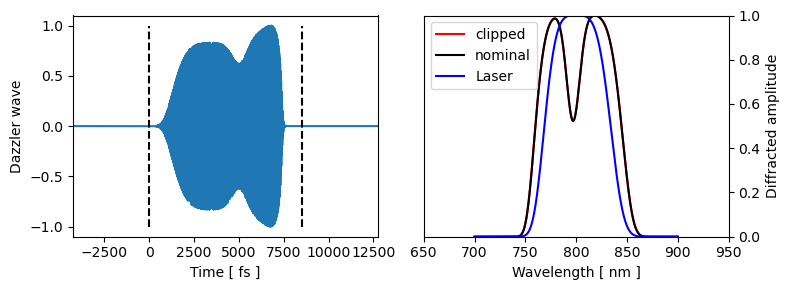

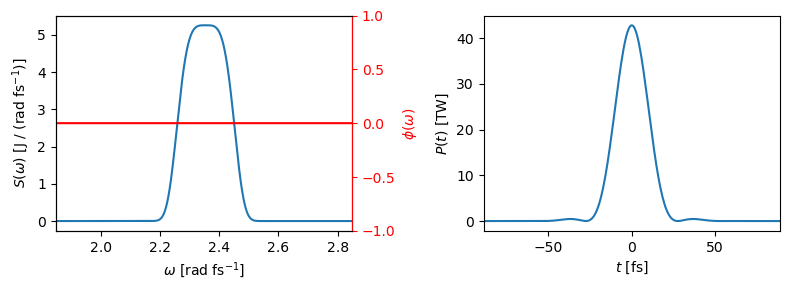

In [2]:
daz.plot_dazzler()
daz.plot_laser()
daz.calc_laser_energy()



Text(0, 0.5, '$S(\\lambda)$ [normalised]')

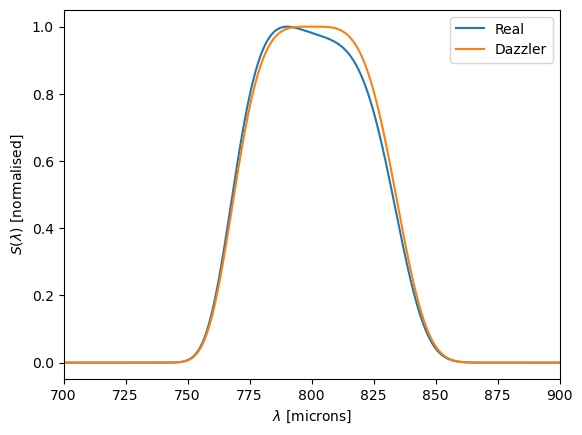

In [3]:
S_w = np.abs(daz.E_w**2)
l, S_l = omega2lambda(daz.w,S_w,dazzler_style=False)
plt.plot(l,S_l/np.max(S_l),label='Real')
l, S_l = omega2lambda(daz.w,S_w,dazzler_style=True)
plt.plot(l,S_l/np.max(S_l),label='Dazzler')
plt.legend()
plt.xlim([700,900])
plt.xlabel(r"$\lambda$ [microns]")
plt.ylabel(r"$S(\lambda)$ [normalised]")


# Dazzler operation
Plot dazzler acoustic wave and diffracted spectral efficiency
Also plots resultant optical pulse after compression.
It is assumed that the spectrum is after the full amplification and so that no amplitude modulation is done by the dazzler - apart from crystal window clipping.

np.float64(5.586964041843948e-14)

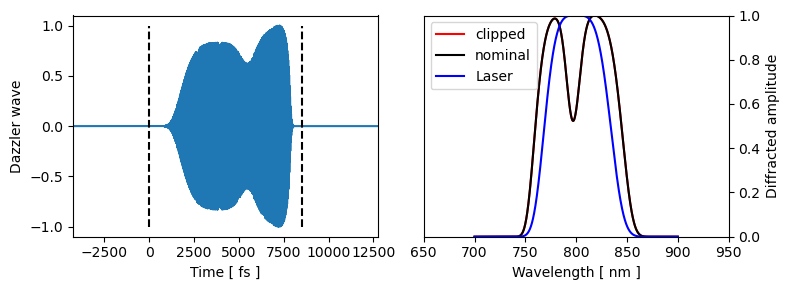

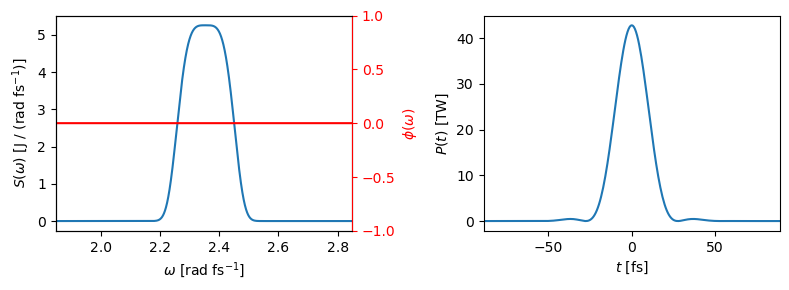

In [4]:

l = np.linspace(700,900,num=1000)
l, S_l = omega2lambda(daz.w,S_w,l_axis=l)
delay,T_err = daz.optimise_delay(l,S_l)
daz.new_settings['delay'] = delay
daz.plot_dazzler()
daz.plot_laser()
daz.calc_spectrum_error(l,S_l)


Example of clipping the spectrum with poorly chosen delay

Energy = 0.448 J


np.float64(0.5728000240239597)

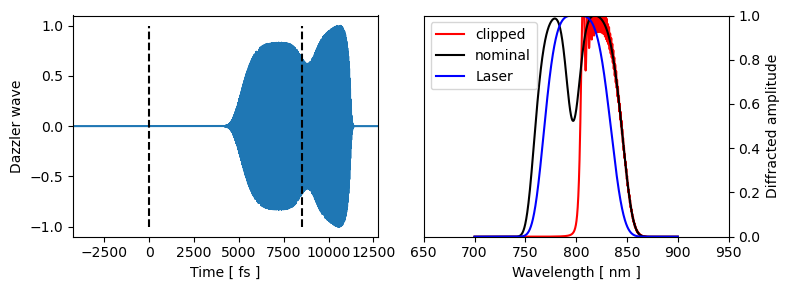

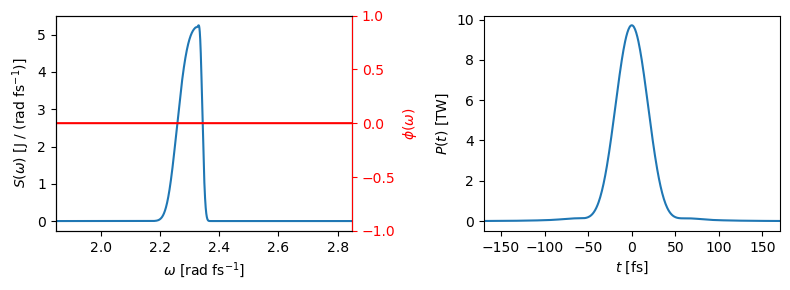

In [5]:
daz.new_settings['delay'] = 8500
# daz.new_settings['order2'] = 20000
daz.plot_dazzler(l,S_l/np.max(S_l))
fh, (ax1,ax2,ax1_2) = daz.plot_laser()

E_t_final = daz.calc_optical()
print('Energy = ' + "{:.3f}".format(np.trapezoid(np.abs(E_t_final)**2,x=daz.t)) + ' J')

daz.calc_spectrum_error(l,S_l)


Large modifications to the chirp (+ FOD/TOD) can also result in spectral clipping

Tranmitted Energy = 0.926 J
Max Power = 0.343 TW


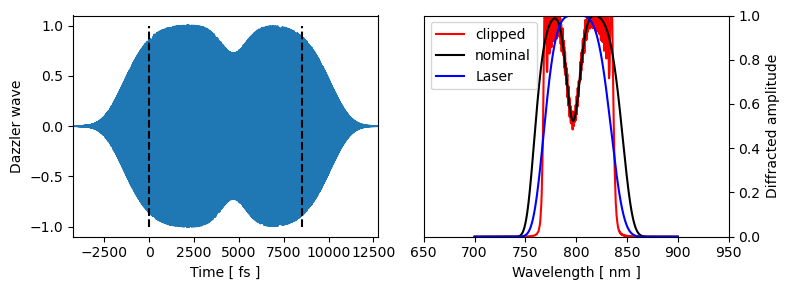

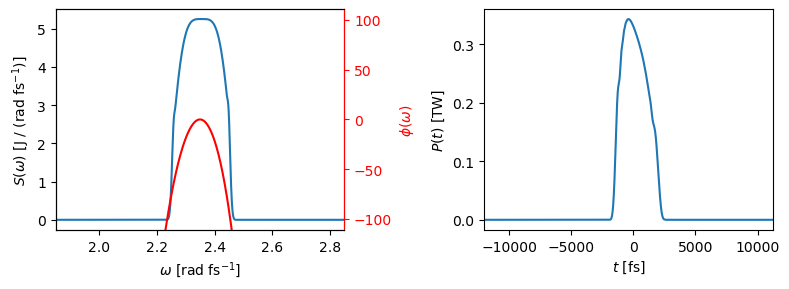

In [6]:
# can modify parameters to see effect
daz.new_settings['order2']=40000
daz.new_settings['order3']=0
daz.new_settings['order4']=0
(delay,T_err) = daz.optimise_delay(l,S_l)

daz.plot_dazzler(l,S_l/np.max(S_l));
daz.plot_laser()

print(f'Tranmitted Energy = {daz.calc_laser_energy():1.03f} J')
E_t_final = daz.calc_optical()
P_TW = np.abs(E_t_final**2)*1e3

print(f'Max Power = {np.max(P_TW):1.03f} TW')

THe device also shouldn't operate with very short acoustic waves as the diffraction efficiency will suffer. This effect is not modelled and should be checked for independently.

Tranmitted Energy = 1.000 J
Max Power = 0.271 TW


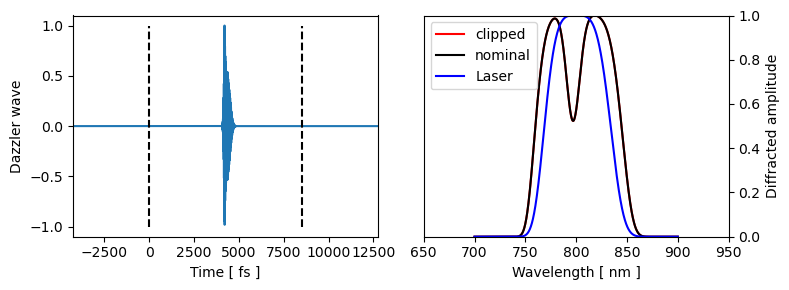

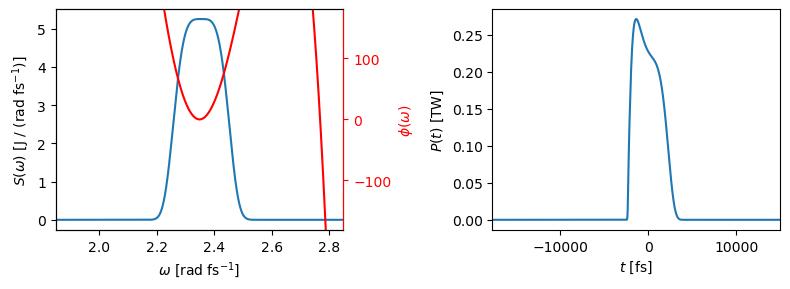

In [7]:
# can modify parameters to see effect
daz.new_settings['order2']=1000
daz.new_settings['order3']=1e4
daz.new_settings['order4']=1e5
(delay,T_err) = daz.optimise_delay(l,S_l)

daz.plot_dazzler(l,S_l/np.max(S_l));
daz.plot_laser()

print(f'Tranmitted Energy = {daz.calc_laser_energy():1.03f} J')
E_t_final = daz.calc_optical()
P_TW = np.abs(E_t_final**2)*1e3

print(f'Max Power = {np.max(P_TW):1.03f} TW')

(<Figure size 800x300 with 3 Axes>,
 (<Axes: xlabel='$\\omega$ [rad fs$^{-1}$]', ylabel='$S(\\omega)$ [J / (rad fs$^{-1}$)]'>,
  <Axes: xlabel='$t$ [fs]', ylabel='$P(t)$ [TW]'>,
  <Axes: ylabel='$\\phi(\\omega)$ '>))

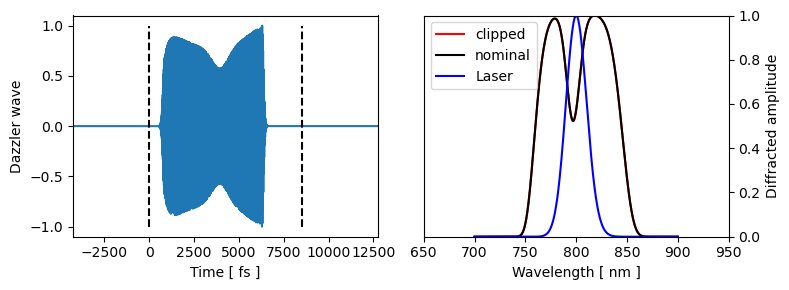

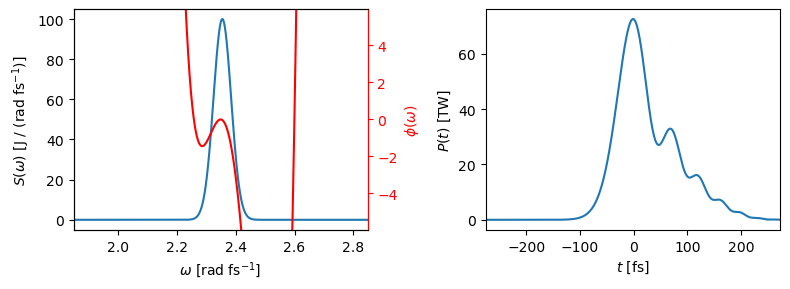

In [8]:
w_0 = 2*np.pi*daz.c/800
daz.w = np.linspace(-5,5,2**16)+w_0
daz.E_w = np.exp(-(daz.w-w_0)**2/(4*0.03**2))*10
daz.new_settings['order2']=26000
daz.new_settings['order3']=0
daz.new_settings['order4']=-2e6
daz.optimise_delay()
daz.plot_dazzler()
daz.plot_laser()


# Finding phase limits
Can use calculation of diffracted spectrum to limit range of acceptable phase parameters
Should also consider the width of the acoustic signal - can not be too short.

In [9]:
N2 = 11
N3 = 9
N4 = 5
o2 = np.linspace(-1e3,1e3,num=N2)+daz.pulse_settings['order2']
o3 = np.linspace(-5e4,5e4,num=N3)+daz.pulse_settings['order3']
o4 = np.linspace(-1e6,1e6,num=N4)+daz.pulse_settings['order4']

import sys

k=0
T_mat = np.zeros((N2,N3,N4))
D_mat = np.zeros((N2,N3,N4))
P_TW_mat = np.zeros((N2,N3,N4))
for n in range(0,N2):
    for m in range (0,N3):
        for p in range (0,N4):
            k=k+1
            sys.stdout.flush()
            daz.new_settings['order2'] = o2[n]
            daz.new_settings['order3'] = o3[m]
            daz.new_settings['order4'] = o4[p]
            (delay, T_err) = daz.optimise_delay(l,S_l)
            E_t_final = daz.calc_optical()
            P_TW = np.abs(E_t_final**2)*1e3
            print(k, '/',N2*N3*N4, end='\r')
            T_mat[n,m,p] = T_err
            D_mat[n,m,p]= delay
            P_TW_mat[n,m,p]=np.max(P_TW)


495 / 495

Text(0, 0.5, 'TOD [$10^3$ fs$^4$]')

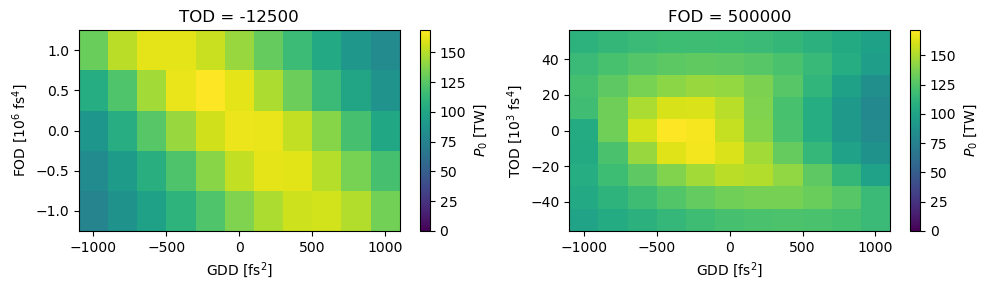

In [11]:
fig,axs = plt.subplots(1,2,figsize=(10,3),tight_layout=True)
ind_3 = 3
img = P_TW_mat[:,ind_3,:].T

ih=axs[0].pcolormesh(o2-daz.pulse_settings['order2'],
               (o4-daz.pulse_settings['order4'])/1e6,
               img,
               vmin=0)
axs[0].set_title(f'TOD = {o3[ind_3]-daz.pulse_settings['order3']:0.0f}')
plt.colorbar(ih,label=r'$P_0$ [TW]')
axs[0].set_xlabel(r'GDD [fs$^2$]')
axs[0].set_ylabel(r'FOD [$10^6$ fs$^4$]')

ind_4 =3
img = P_TW_mat[:,:,ind_4].T

ih = axs[1].pcolormesh(o2-daz.pulse_settings['order2'],
               (o3-daz.pulse_settings['order3'])/1e3,
               img,
               vmin=0)
axs[1].set_title(f'FOD = {o4[ind_4]-daz.pulse_settings['order4']:0.0f}')
plt.colorbar(ih,label=r'$P_0$ [TW]')
axs[1].set_xlabel(r'GDD [fs$^2$]')
axs[1].set_ylabel(r'TOD [$10^3$ fs$^4$]')
